In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 18})

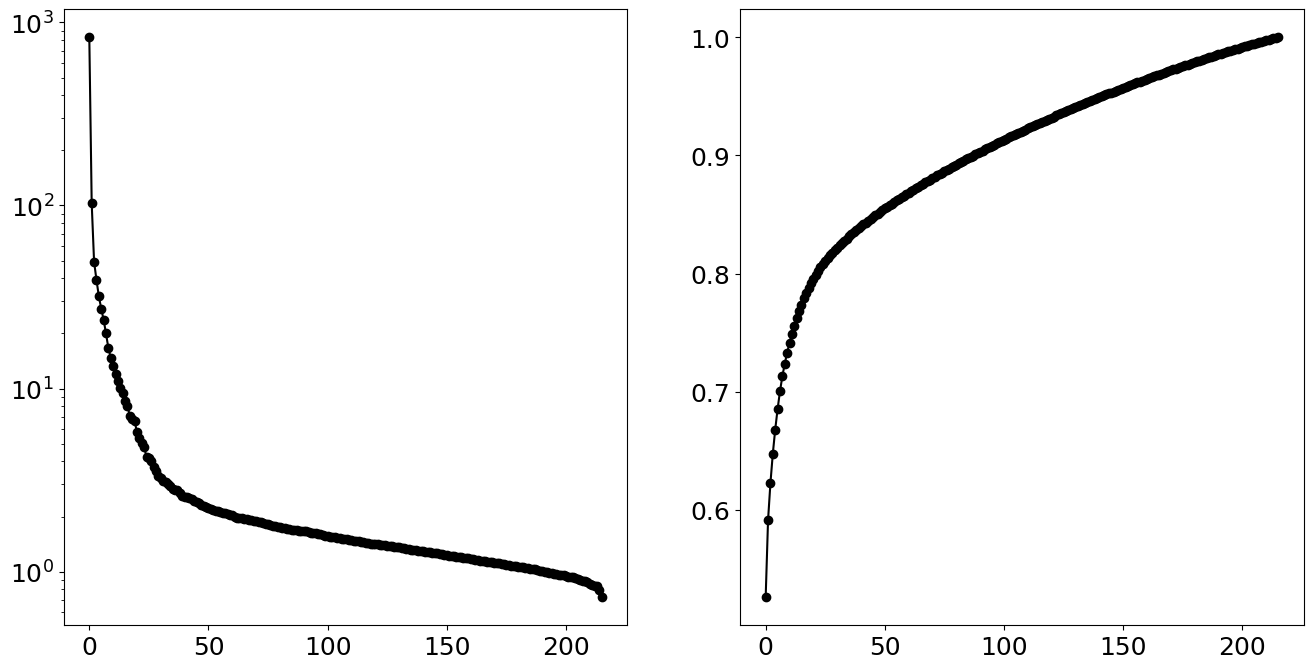

In [8]:
obs_path = os.path.join('..', 'data', 'ovariancancer_obs.csv')
obs = np.loadtxt(obs_path, delimiter=',')

grp_path = os.path.join('..', 'data', 'ovariancancer_grp.csv')
f = open(grp_path, 'r')
grp = f.read().split('\n')

U, S, VT = np.linalg.svd(obs, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/ np.sum(S), '-o', color='k')

plt.show()